\textbf{LABORATORIUM 3 - REGRESJA WIELOMIANOWA}

Na dzisiejszych zajęciach dowiemy się, jak zastosować regresję z użyciem funkcji wielomianowej. Nauczymy się również rozpoznawać niedotrenowane i przetrenowane modele. 

Zacznijmy od importu niezbędnych bibliotek.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Przygotujmy teraz funkcję, która będzie tworzyła obiekt klasy PolynomialFeatures() z biblioteki Scikit-learn i za jego pomocą przygotowywała odpowiedni stopień dostarczonych danych, a następnie trenowała obiekt klasy LinearRegression().

In [42]:
def polynomial_regression(attributes,
                          degree,
                          values):
    '''
    Argumenty:
    ----------
    attributes - wektor cech do treningu (X)
    degree - stopień wielomianu, którym chcemy dokonywać regresji
    values - wartości odpowiadające cechom z 'attributes', których model ma się nauczyć (Y)
    '''
    regression = PolynomialFeatures(degree=degree)
    # Stwórzmy teraz kolejne potęgi cech. Jeśli potrzebujemy wielomianu stopnia
    # N, to musimy dla wszystkich danych wygenerować potęgi (2, ..., N-1).
    polynomial = regression.fit_transform(attributes)
    # Gdy mamy tak przygotowane dane, możemy wyuczyć model regresji.
    pol_regression = LinearRegression()
    pol_regression.fit(polynomial, values)
    return regression, pol_regression

Drugą pomocniczą funkcją, którą musimy zdefiniować, jest funkcja, która jest potrzebna przy tworzeniu wykresów. Nasze dane muszą być posegregowane według argumentów (cech). Musimy zatem je połączyć z odpowiadającymi im wartościami funkcji (nie możemy ich sortować osobno, otrzymamy wówczas błąd, bo przypiszemy złe wartości do argumentów).

In [43]:
def sort_two_lists(list1, list2):
    # Łączymy dane kolumnowo.
    merged = np.concatenate((list1, list2), axis=1)
    # Sortujemy według argumentów, które są w 0-wej kolumnie.
    sorted_list = merged[merged[:, 0].argsort()]
    return(sorted_list)

Przekonajmy się, jak działa metoda argsort() na małym przykładzie.

In [44]:
a = np.array([[0, 1, 3], [5, 0, 2], [3, -1, 0]])
a = a[a[:, 0].argsort()]
print(a)

[[ 0  1  3]
 [ 3 -1  0]
 [ 5  0  2]]


Zobaczmy też działanie metod klasy PolynomialFeatures().

In [45]:
X = [[1], [0], [3], [5], [-1], [4]]
polynomial = PolynomialFeatures(degree=3)
print(polynomial.fit_transform(X))

[[  1.   1.   1.   1.]
 [  1.   0.   0.   0.]
 [  1.   3.   9.  27.]
 [  1.   5.  25. 125.]
 [  1.  -1.   1.  -1.]
 [  1.   4.  16.  64.]]


Stwórzmy teraz główną funkcję odpowiedzialną za wykonanie regresji wielomianowej. Przygotujemy również wykresy, które pokażą nam, jak nauczyły się poszczególne modele.

In [46]:
def prepare_regression(attributes, values, max_degree):
    '''
    Argumenty:
    ----------
    attributes - wektor cech (X), zarówno zbiór treningowy jak i testowy
    values - wartości odpowiadające cechom z 'attributes'
    max_degree - maksymalny stopień wielomianu, przy pomocy którego chcemy wykonać regresję
    '''
    # Podzielmy dane na zbiór treningowy i testowy w stosunku 70%/30%.
    X_train, X_test, y_train, y_test = train_test_split(attributes,
                                                        values,
                                                        test_size=0.3,
                                                        random_state=10)
    # Przygotujmy również puste listy, gdzie będziemy umieszczać kolejno:
    # modele regresji, współczynniki wielomianów oraz wartości błędów na zbiorach 
    # treningowym i testowym.
    models, parameters, train_errors, test_errors, predictions = [], [], [], [], []
    
    plt.figure(figsize=(12, 7))
    # Wykonajmy regresje wielomianami stopnia (1, 2, ..., max_degree)
    for i in range(1, max_degree + 1):
        poly_model, linear_model = polynomial_regression(X_train,
                                                         i,
                                                         y_train)
        models.append(linear_model)
        parameters.append(linear_model.coef_)
        # Dokonajmy predykcji na zbiorach treningowym i testowym i zmierzmy
        # wartość błędu średniokwadratowego. Najpierw musimy utworzyć wartości
        # kolejnych potęg dla argumentów.
        y_train_prediction = linear_model.predict(poly_model.fit_transform(X_train))
        y_test_prediction = linear_model.predict(poly_model.fit_transform(X_test))
        predictions.append(y_test_prediction)
        train_errors.append(mean_squared_error(y_train_prediction, y_train))
        test_errors.append(mean_squared_error(y_test_prediction, y_test))
        # Zobaczmy, jak poszczególne modele radziły sobie ze zbiorem testowym.
        # W tym celu posortujmy zbiór testowy zgodnie z argumentami.
        sorted_predictions = sort_two_lists(X_test, y_test_prediction)
        # Przygotujmy wykresy.
        plt.subplot(3, 5, i)
        plt.scatter(X_test, y_test, color='red')
        plt.plot(sorted_predictions[:, 0], sorted_predictions[:, 1], '-o',
                 linewidth=1, markersize=4, color='blue')
       
    plt.tight_layout()
    plt.show()
    return models, parameters, train_errors, test_errors, predictions

Przygotujmy teraz losowe dane.

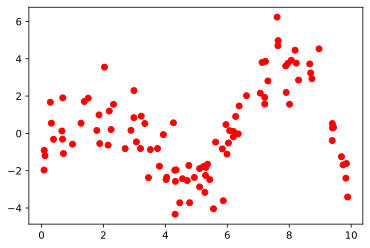

In [47]:
np.random.seed(seed=8)
m = 100
X = 10 * np.random.rand(m, 1)
y = 0.5 * X * np.sin(X) + np.random.randn(m, 1)
%config InlineBackend.figure_format = 'svg'
plt.scatter(X, y, color='red')
plt.show()
plt.close()

Wytrenujmy na nich modele regresji wielomianowej.

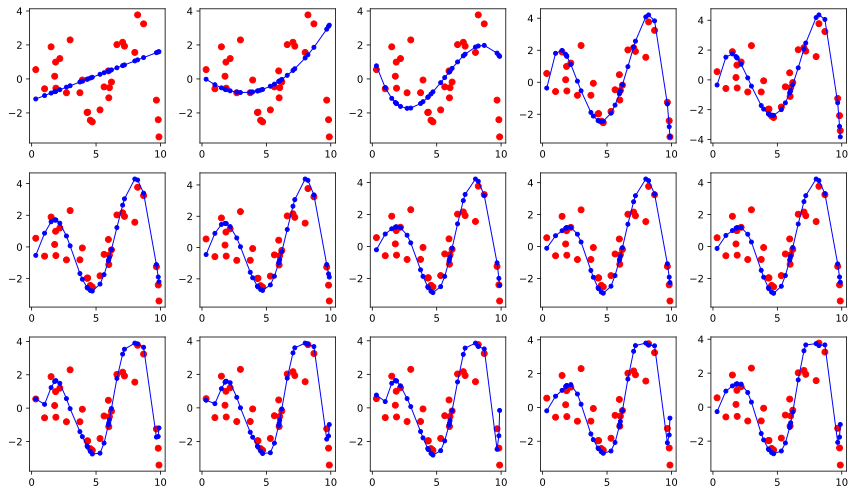

In [48]:
models, parameters, train_errors, test_errors, predictions = prepare_regression(X,
                                                                                y,
                                                                                15)

In [49]:
print('Wartości błędów na zbiorze treningowym:')

for i in range(1, 16):
    print(f'''Stopień wielomianu: {i},
              błąd na zb. treningowym: {train_errors[i - 1]},
              błąd na zb. testowym: {test_errors[i - 1]}''')

Wartości błędów na zbiorze treningowym:
Stopień wielomianu: 1,
              błąd na zb. treningowym: 5.584854107411729,
              błąd na zb. testowym: 4.011953337052041
Stopień wielomianu: 2,
              błąd na zb. treningowym: 5.074726422694712,
              błąd na zb. testowym: 4.7584881673115484
Stopień wielomianu: 3,
              błąd na zb. treningowym: 4.564094807584198,
              błąd na zb. testowym: 3.6893280286143617
Stopień wielomianu: 4,
              błąd na zb. treningowym: 1.4211175466170842,
              błąd na zb. testowym: 1.3283900831549467
Stopień wielomianu: 5,
              błąd na zb. treningowym: 1.3993650735569931,
              błąd na zb. testowym: 1.2698772014437998
Stopień wielomianu: 6,
              błąd na zb. treningowym: 1.1859757574461054,
              błąd na zb. testowym: 1.3184919367484071
Stopień wielomianu: 7,
              błąd na zb. treningowym: 1.177062293603805,
              błąd na zb. testowym: 1.317272266319993
Stopień

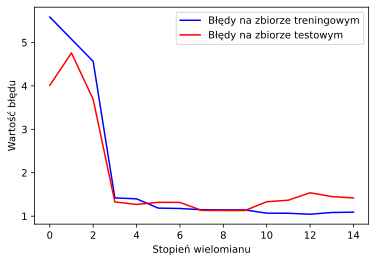

In [50]:
plt.plot(train_errors, color='blue', label='Błędy na zbiorze treningowym')
plt.plot(test_errors, color='red', label='Błędy na zbiorze testowym')
plt.legend()
plt.xlabel('Stopień wielomianu')
plt.ylabel('Wartość błędu')
plt.show()

Modele o niskim stopniu wielomianu, np. funkcja liniowa, kwadratowa, itd., nie są w stanie sprostać nieliniowym danym, dzięki czemu obserwujemy dużą wartość błędu predykcji. W pewnym momencie jednak modele ulegają przetrenowaniu - poznajemy to po tym, że wartość błędu na zbiorze testowym (czyli danych, których nie widział model podczas treningu) zaczyna rosnąć, podczas gdy wartość błędu na zbiorze treningowym wciąż maleje.